# Ticks
Se le denomina ticks al conjunto de etiquetas ubicadas en el Eje X y Y. 
- Su utilidad es poder codificar los valores o puntos del gráfico a valores específicos en el Eje X y Y
- Un gráfico sin Ticks es ilegible

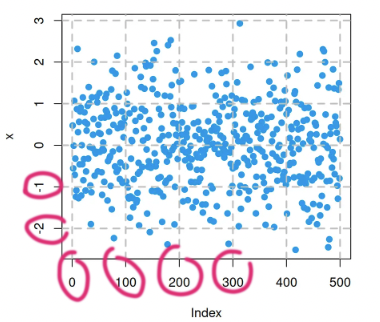

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('../data/tiendas_procesado.csv', index_col='fecha')
df

,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


# Pandas

[Text(0, 500000, '500 mil'), Text(0, 1000000, '1 millón')]

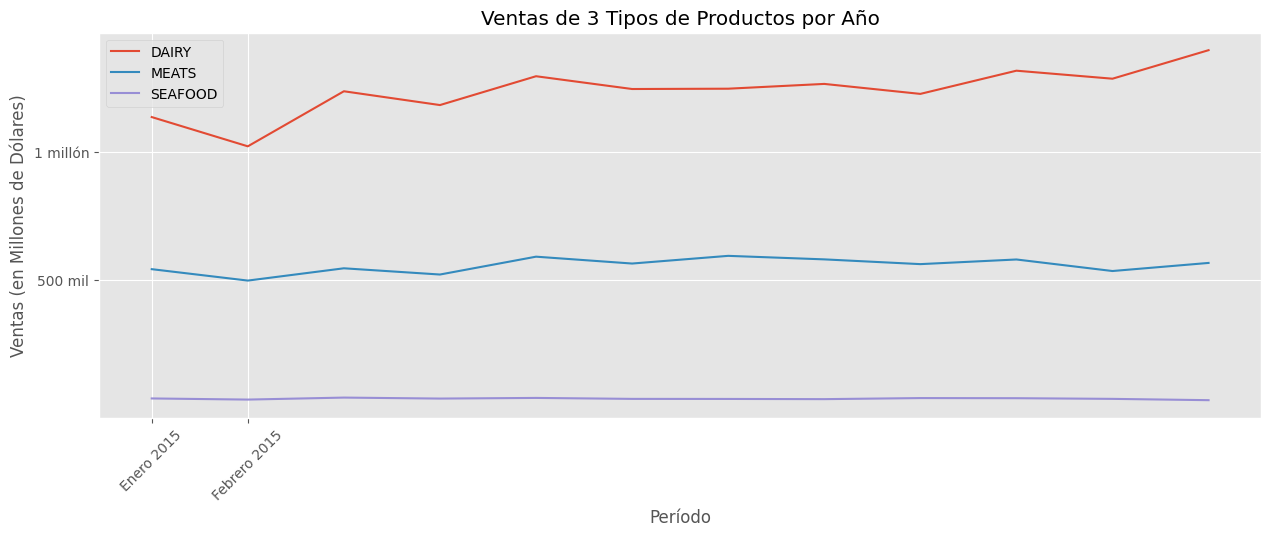

In [11]:
plt.style.use(
    'ggplot' 
)
ax = df.plot.line(
    figsize=(15, 5),
    title='Ventas de 3 Tipos de Productos por Año' 
)
ax.set_xlabel('Período')
ax.set_ylabel('Ventas (en Millones de Dólares)')

# cada uno de los ticks tienen una posición empezando desde el cero, como un arreglo (al ser categoricas usan la posición)
ax.set_xticks([0,1]) # defino solo dos posiciones
ax.set_xticklabels(['Enero 2015', 'Febrero 2015'], rotation=45) # coloco los valores para esas posiciones y rotanción de 45 grados

# en el eje Y a ase un valor númerico y no categoriaca
ax.set_yticks([500000,1000000]) # defino solo dos etiquetas para el valor de 500 mil y 1 millón
ax.set_yticklabels(['500 mil', '1 millón']) # coloco los valores

[Text(0, 0, '2015-01'),
 Text(1, 0, '2015-02'),
 Text(2, 0, '2015-03'),
 Text(3, 0, '2015-04'),
 Text(4, 0, '2015-05'),
 Text(5, 0, '2015-06'),
 Text(6, 0, '2015-07'),
 Text(7, 0, '2015-08'),
 Text(8, 0, '2015-09'),
 Text(9, 0, '2015-10'),
 Text(10, 0, '2015-11'),
 Text(11, 0, '2015-12')]

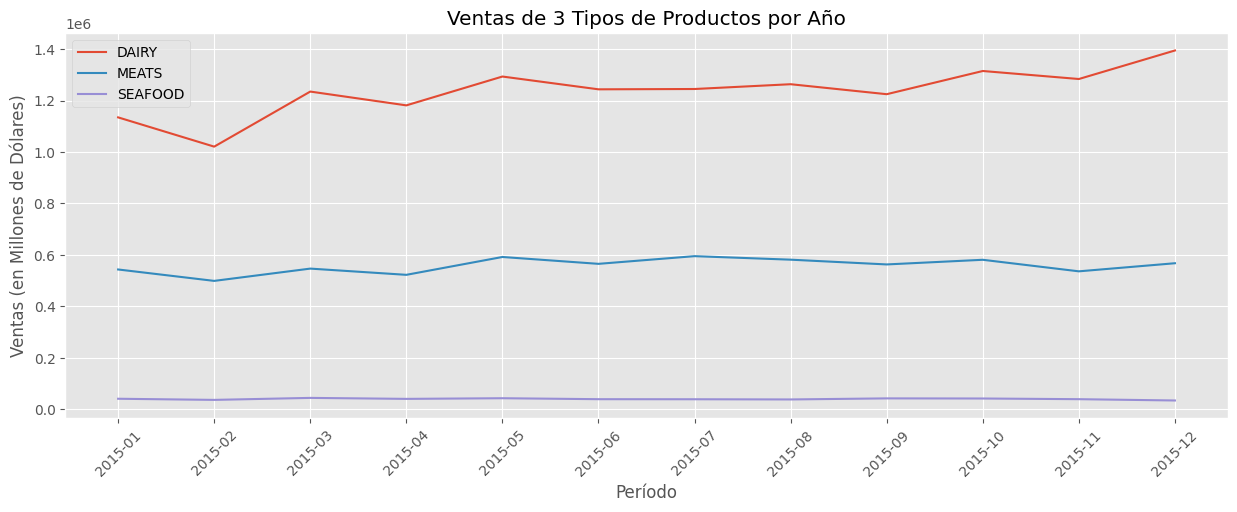

In [5]:
plt.style.use(
    'ggplot' 
)
ax = df.plot.line(
    figsize=(15, 5),
    title='Ventas de 3 Tipos de Productos por Año' 
)
ax.set_xlabel('Período')
ax.set_ylabel('Ventas (en Millones de Dólares)')

# Si quiero redefinir todas mis etiquetas
# Primero tengo que definir una lista con las posiciones 
# que tendran mis etiquetas en el eje X
posiciones = np.arange(0, len(df))
# Luego le digo al gráfico en que posiciones quiero tener mis etiquetas
ax.set_xticks(posiciones) # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html
# Finalmente defino las etiquetas que quiero
ax.set_xticklabels(
    df.index.values, 
    rotation=45 # Rotacion de las etiquetas
)

# Por ejemplo, si solo quisiera etiquetas en la primera y tercera posicion del EJE X haria lo siguiente:
# ax.set_xticks([0, 2]) 
# ax.set_xticklabels(['Primera', 'Tercera'], rotation=45)

# Otra tecnica comun es utilizar saltos
# ax.set_xticks(
#     posiciones[::2]
# ) 
# ax.set_xticklabels(
#     df.index.values[::2]
# )

# Tambien puedo hacerlo con el eje Y
# ax.set_yticks(
#     [1000000],
# )

# ax.set_yticklabels(
#     ['UN MILLON'], 
#     rotation=45 # Rotacion de las etiquetas
# )

# Seaborn

[Text(0, 0, 'A'), Text(1, 0, 'B')]

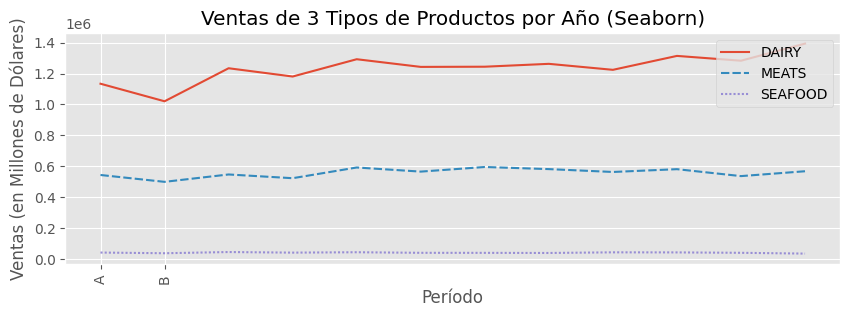

In [4]:
plt.figure(
    figsize=(10, 3)
)

# Almaceno mi figura en una variable
# Esto es equivalente a una figura de Matplotlib
ax = sns.lineplot(
    df
)

ax.set(
    xlabel='Período', 
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)',
)

# Misma logica
ax.set_xticks([0, 1])
ax.set_xticklabels(labels=['A', 'B'], rotation=90)

# Plotly

In [ ]:
fig = px.line(
    df,
    width=800, 
    height=500,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', 
    labels={
        "fecha": "Periodo",
        "value": "Ventas por año (en millones de $)",
        "variable": "Tipo de Producto"
    }
)


fig.update_xaxes(
    tickangle=45, # angulo
    tickmode='array',
    tickvals=df.index.values # Valores de las etiquetas, podemos agregar [::4] para que salte 4 pocisiones
)

fig.update_yaxes(
    nticks=20, # Es un valor aproximado de cuantos ticks mostrar, al final plotly decide cuantas mostrar según el alto y el rango de valores existentes
    # dtick=500000, # Espaciado entre cada tick (dada la escala del Eje Y), el intervalo entre los valores
    # tickvals=[500000, 1000000] # Puedo decirle valores especificos a mostrar, deben ser valores númericos que esten dentro del Eje
)

fig.show()